In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Importing liberaries for data analysis

In [2]:
cx=pd.read_csv("CARS x2.csv")
cx

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


Calling the csv file for the data analysis

In [3]:
cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Collecting the informations about the readed csv file:

0.   Make        - 428 non-null  -  object

1.   Model       - 428 non-null  -  object

2.   Type        - 428 non-null  -  object

3.   Origin      - 428 non-null  -  object

4.   DriveTrain  - 428 non-null  -  object

5.   MSRP        - 428 non-null  -  object

6.   Invoice     - 428 non-null  -  object

7.   EngineSize  - 428 non-null  -  float64

8.   Cylinders   - 426 non-null  -  float64

9.   Horsepower  - 428 non-null  -  int64

10.  MPG_City    - 428 non-null  -  int64

11.  MPG_Highway - 428 non-null  -  int64

12.  Weight      - 428 non-null  -  int64

13.  Wheelbase   - 428 non-null  -  int64

14.  Length      - 428 non-null  -  int64

dtypes: float64(2), int64(6), object(7)

memory usage: 50.3+ KB

In [4]:
cx.shape

(428, 15)

The shape of the csv file is:

Rows - 428

Columns - 15

In [5]:
cx.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

Taking the total null values in the csv file:

The csv file having two null values in the "Cylinders" named columns

In [6]:
nan=cx[cx.isna().any(axis=1)]
nan

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


To identify the which rows having the null values by isna format

The rows of 247 and 248 are having the null values

In [7]:
nan=cx[cx.isnull().any(axis=1)]
nan

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


To identify the which rows having the null values by isnull format

The rows of 247 and 248 are having the null values

In [8]:
cx=cx.drop(247)
cx=cx.drop(248)

By the reference this cannot be filled by any values, because this vehicle is an rotary engine powered vehicle, it is differ from other datas. So it will be deleted by the entire rows.

In [9]:
cx.shape

(426, 15)

After deleting unwanted rows the shape of the csv file is:

Rows - 426

Columns - 15

In [10]:
cx.duplicated().sum()

0

Checking any duplicated data in the entire dataframe and it having no duplicates 

In [11]:
cx.mean()

EngineSize        3.205634
Cylinders         5.807512
Horsepower      215.877934
MPG_City         20.070423
MPG_Highway      26.854460
Weight         3580.474178
Wheelbase       108.164319
Length          186.420188
dtype: float64

Checking the mean value of the entire Dataframe is:

EngineSize    -    3.205634

Cylinders     -    5.807512

Horsepower    -  215.877934

MPG_City      -   20.070423

MPG_Highway   -   26.854460

Weight        - 3580.474178

Wheelbase     -  108.164319

Length        -  186.420188

dtype: float64

In [12]:
# Removing the formatt

cx['MSRP'] = [x.replace('$','')for x in cx['MSRP']]
cx['MSRP'] = [x.replace(',','')for x in cx['MSRP']]
cx['Invoice'] = [x.replace('$','')for x in cx['Invoice']]
cx['Invoice'] = [x.replace(',','')for x in cx['Invoice']]

Removing the unwanted format of Dollor sign ($) and coma sign (,) by Replace command from the columns MSRP and Invoice for further analysis to make easier

In [13]:
cx.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

Checking the types of format 

The columns MSRP and Invoice were in object types, that can't be easy to analysis so it would be converted to integers from the strings/Object.

In [14]:
cx['MSRP']=pd.to_numeric(cx['MSRP'],errors='coerce')
cx['Invoice']=pd.to_numeric(cx['Invoice'],errors='coerce')

Converting the MSRP and Invoice, integers from the strings/Object format.

In [15]:
cx.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

Finaly checking that the conversion is done succesfully

In [16]:
cx.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


Taking the head of the Dataframe.

In [17]:
cx['Make'].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Jaguar           12
Hyundai          12
Lexus            11
Kia              11
Subaru           11
Pontiac          11
Mercury           9
Lincoln           9
Buick             9
Mazda             9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Porsche           7
Acura             7
Saab              7
Oldsmobile        3
Land Rover        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: Make, dtype: int64

Taking the value count of the column "Make" for bar ploting

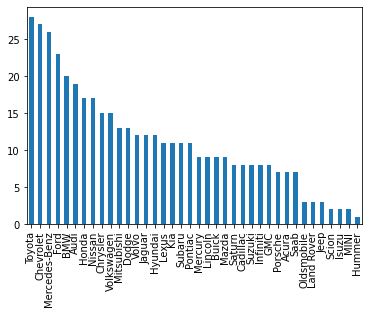

In [18]:
cx.Make.value_counts().plot.bar()
plt.show()

The bar plotting of the column "Make".

Sedan     262
SUV        60
Sports     47
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64


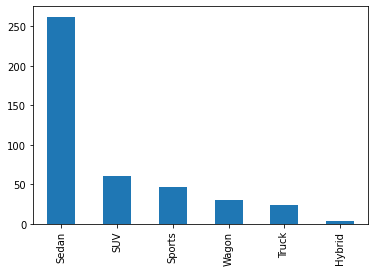

In [19]:
b=cx['Type'].value_counts()
print(b)
cx.Type.value_counts().plot.bar()
plt.show()

Taking the value count of the column "Type" for bar ploting:

Sedan    - 262

SUV      -  60

Sports   -  47

Wagon    -  30

Truck    -  24

Hybrid   -   3

The bar plotting of the column "Type" showing that.

The most of the Vehicle sold out is Sedan Type and the least is Hybrid.

Asia      156
USA       147
Europe    123
Name: Origin, dtype: int64


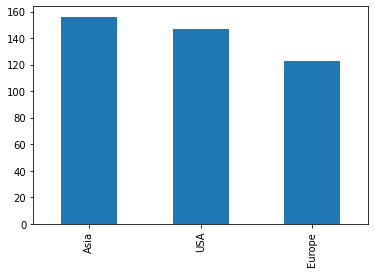

In [20]:
b=cx['Origin'].value_counts()
print(b)
cx.Origin.value_counts().plot.bar()
plt.show()

Taking the value count of the column "Origin" for bar ploting:

Asia    -  156

USA     -  147

Europe  -  123

The bar plotting of the column "Origin" showing that.

The most of the Vehicle Orgin from the Asia.

Front    226
Rear     108
All       92
Name: DriveTrain, dtype: int64


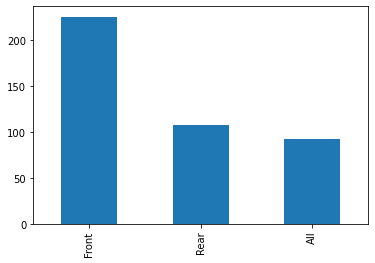

In [21]:
b=cx['DriveTrain'].value_counts()
print(b)
cx.DriveTrain.value_counts().plot.bar()
plt.show()

Taking the value count of the column "DriveTrain" for bar ploting:

Front -   226

Rear  -   108

All   -    92
The bar plotting of the column "DriveTrain" showing that.

The most of the Vehicle DriveTrain is Front.

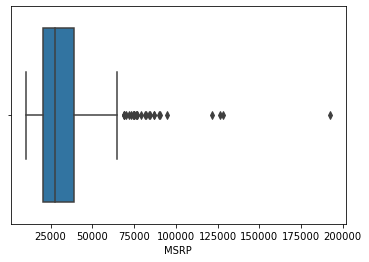

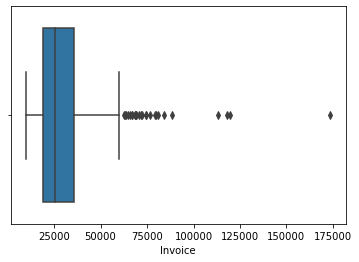

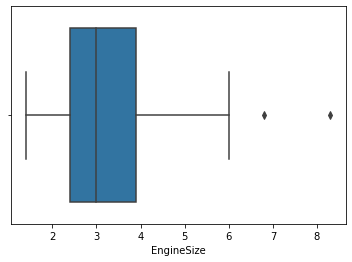

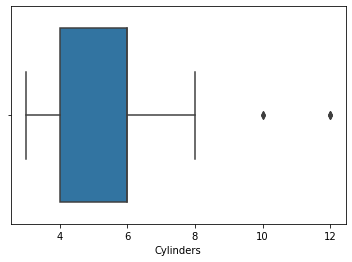

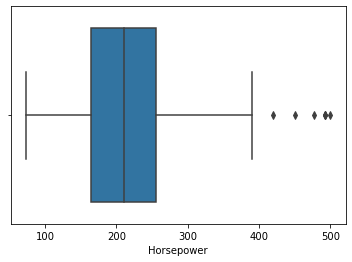

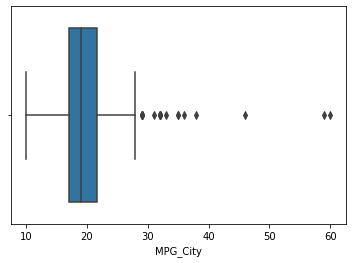

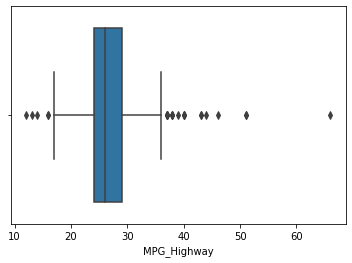

In [22]:
sns.boxplot(x=cx['MSRP'])
plt.show()
sns.boxplot(x=cx['Invoice'])
plt.show()
sns.boxplot(x=cx['EngineSize'])
plt.show()
sns.boxplot(x=cx['Cylinders'])
plt.show()
sns.boxplot(x=cx['Horsepower'])
plt.show()
sns.boxplot(x=cx['MPG_City'])
plt.show()
sns.boxplot(x=cx['MPG_Highway'])
plt.show()

The Boxplot shows the different columns of MSRP, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway

<AxesSubplot:xlabel='MPG_Highway'>

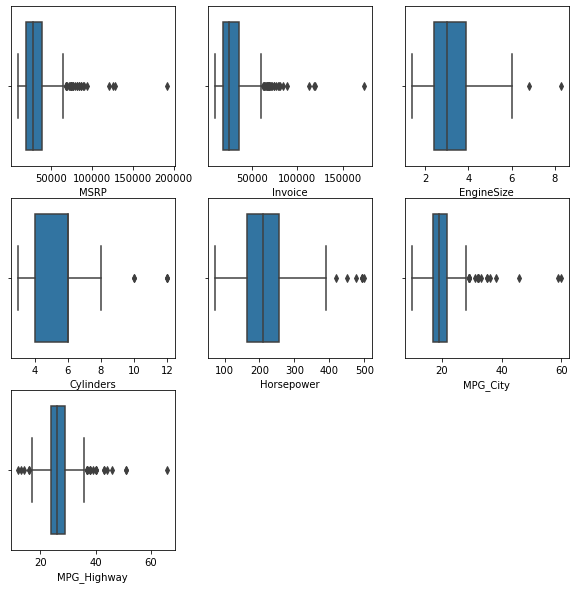

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x=cx['MSRP'])
plt.subplot(3,3,2)
sns.boxplot(x=cx['Invoice'])
plt.subplot(3,3,3)
sns.boxplot(x=cx['EngineSize'])
plt.subplot(3,3,4)
sns.boxplot(x=cx['Cylinders'])
plt.subplot(3,3,5)
sns.boxplot(x=cx['Horsepower'])
plt.subplot(3,3,6)
sns.boxplot(x=cx['MPG_City'])
plt.subplot(3,3,7)
sns.boxplot(x=cx['MPG_Highway'])

The Subxplot shows the different columns of MSRP, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway



In [24]:
Q1=cx.quantile(0.25)
print(Q1)
Q3=cx.quantile(0.75)
print(Q3)
IQR=Q3-Q1
print(IQR)

MSRP           20324.75
Invoice        18836.00
EngineSize         2.40
Cylinders          4.00
Horsepower       165.00
MPG_City          17.00
MPG_Highway       24.00
Weight          3111.25
Wheelbase        103.00
Length           178.00
Name: 0.25, dtype: float64
MSRP           39225.00
Invoice        35754.75
EngineSize         3.90
Cylinders          6.00
Horsepower       255.00
MPG_City          21.75
MPG_Highway       29.00
Weight          3979.25
Wheelbase        112.00
Length           194.00
Name: 0.75, dtype: float64
MSRP           18900.25
Invoice        16918.75
EngineSize         1.50
Cylinders          2.00
Horsepower        90.00
MPG_City           4.75
MPG_Highway        5.00
Weight           868.00
Wheelbase          9.00
Length            16.00
dtype: float64


To find the outlayer

In [25]:
cx = cx [ ~ ((cx < (Q1-1.5 * IQR)) | (cx > (Q3 + 1.5 * IQR))).any(axis=1)]
cx.shape

(342, 15)

Equation for the Outlayer

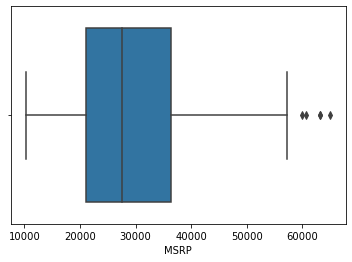

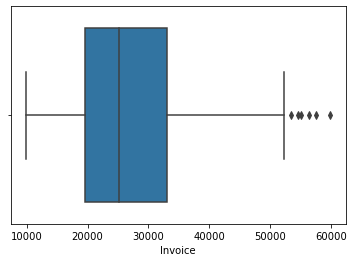

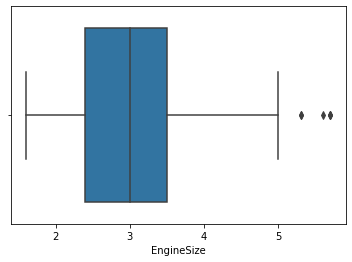

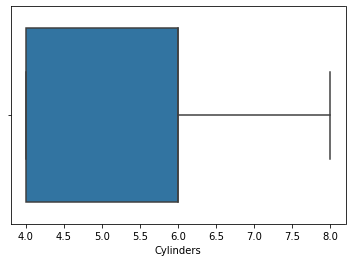

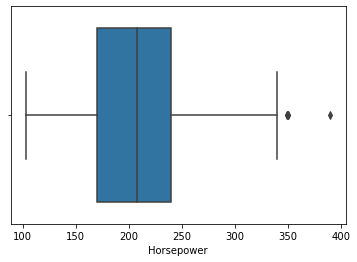

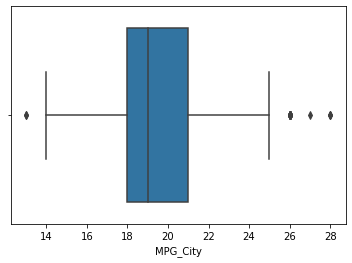

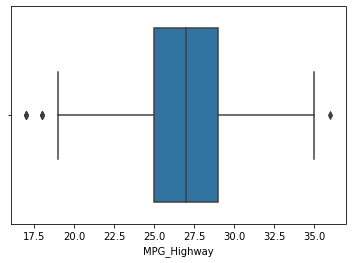

In [26]:
sns.boxplot(x=cx['MSRP'])
plt.show()
sns.boxplot(x=cx['Invoice'])
plt.show()
sns.boxplot(x=cx['EngineSize'])
plt.show()
sns.boxplot(x=cx['Cylinders'])
plt.show()
sns.boxplot(x=cx['Horsepower'])
plt.show()
sns.boxplot(x=cx['MPG_City'])
plt.show()
sns.boxplot(x=cx['MPG_Highway'])
plt.show()

After finding the Outlayer value and removing the extended values

The Boxplot shows the different columns of MSRP, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway having no extreme values, all are removed.

<AxesSubplot:xlabel='MPG_Highway'>

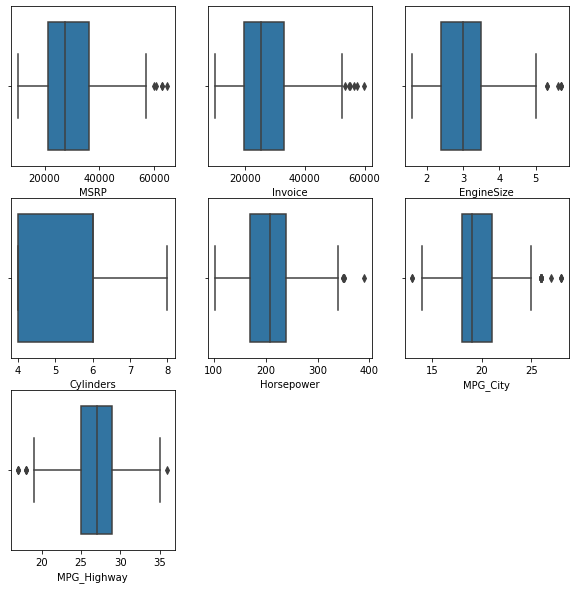

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x=cx['MSRP'])
plt.subplot(3,3,2)
sns.boxplot(x=cx['Invoice'])
plt.subplot(3,3,3)
sns.boxplot(x=cx['EngineSize'])
plt.subplot(3,3,4)
sns.boxplot(x=cx['Cylinders'])
plt.subplot(3,3,5)
sns.boxplot(x=cx['Horsepower'])
plt.subplot(3,3,6)
sns.boxplot(x=cx['MPG_City'])
plt.subplot(3,3,7)
sns.boxplot(x=cx['MPG_Highway'])

After finding the Outlayer value and removing the extended values

The subplot shows the different columns of MSRP, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway having no extreme values, all are removed.

array([[<AxesSubplot:title={'center':'MSRP'}>,
        <AxesSubplot:title={'center':'Invoice'}>,
        <AxesSubplot:title={'center':'EngineSize'}>],
       [<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Horsepower'}>,
        <AxesSubplot:title={'center':'MPG_City'}>],
       [<AxesSubplot:title={'center':'MPG_Highway'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Wheelbase'}>],
       [<AxesSubplot:title={'center':'Length'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

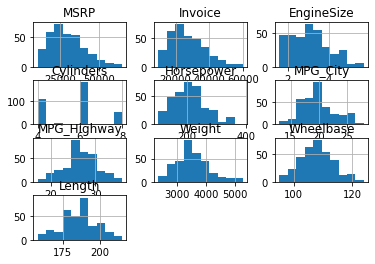

In [28]:
cx.hist()

The histogram of the various columns

Text(0.5, 0, 'Make')

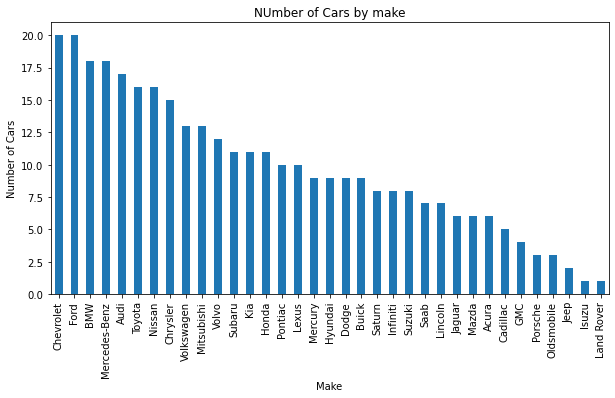

In [29]:
# Plotting a Histogram
# cx.Make.value_counts().plot(kind='bar',figsize=(10,5))
cx.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("NUmber of Cars by make")
plt.ylabel('Number of Cars')
plt.xlabel('Make')

After plotting histogram shows the Ford and Chevorlet is the brands produces more models of the cars and Land Rover and Isuzu having least mdels.

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.998362,0.557403,0.651043,0.819685,-0.620469,-0.502163,0.551079,0.320421,0.174070
Invoice,0.998362,1.000000,0.544307,0.639878,0.815562,-0.614552,-0.497720,0.544779,0.316175,0.167410
EngineSize,0.557403,0.544307,1.000000,0.897525,0.735097,-0.772557,-0.683814,0.745294,0.641216,0.585195
Cylinders,0.651043,0.639878,0.897525,1.000000,0.749429,-0.763247,-0.650353,0.691458,0.562523,0.494595
Horsepower,0.819685,0.815562,0.735097,0.749429,1.000000,-0.721691,-0.612886,0.599402,0.406915,0.290810
MPG_City,-0.620469,-0.614552,-0.772557,-0.763247,-0.721691,1.000000,0.911319,-0.834922,-0.573657,-0.428901
MPG_Highway,-0.502163,-0.497720,-0.683814,-0.650353,-0.612886,0.911319,1.000000,-0.793035,-0.463621,-0.278082
Weight,0.551079,0.544779,0.745294,0.691458,0.599402,-0.834922,-0.793035,1.000000,0.749184,0.592488
Wheelbase,0.320421,0.316175,0.641216,0.562523,0.406915,-0.573657,-0.463621,0.749184,1.000000,0.853919
Length,0.174070,0.167410,0.585195,0.494595,0.290810,-0.428901,-0.278082,0.592488,0.853919,1.000000


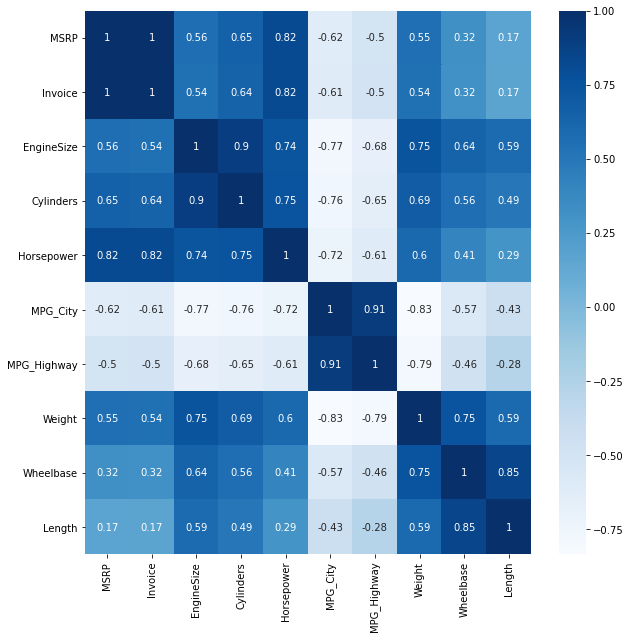

In [30]:
# Finding the relations between the variables.
plt.figure(figsize=(10,10))
c=cx.corr()
sns.heatmap(c,cmap='Blues',annot=True)
c

The heatmap of the Dataframe represents the relations of the each columns
